<h1 align="center">Tilastollinen Päättely 2, Demo 4</h1>

<h3 align="left">Tehtävä 1</h3>

Oletetaan, että $\, X_1,...,X_n \,$ on riippumaton otos jakaumasta $\, Exp(\theta). \,$ Toista luentomonisteen Esim 2.2. testisuureen jakauman simulointi siten, että teet sen isommalla määrällä (m=1000, 10000, 100000). Piirrä testisuureen jakauma (hist) ja myös $\, \chi^2 (1) \,$ -jakauma samaan kuvaajaan. Onko $\, \chi^2 (1) \,$ -approksimaatio hyvä?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv("C:/Users/testi/Desktop/Statistical_Inference2/Esim2_dat.csv",
                 index_col=0)

In [3]:
df

,V1,V2,V3,V4,V5,V6,V7,V8
1,1.686,0.086,0.631,0.328,0.845,0.187,0.244,0.088
2,1.409,0.205,0.649,0.188,0.337,0.503,0.051,0.324
3,0.375,0.325,0.002,0.112,0.503,0.211,0.281,0.090
4,0.494,0.476,0.593,0.178,0.791,0.169,2.386,0.258
5,0.303,0.119,0.446,0.143,0.122,1.023,0.037,0.122
6,0.208,0.189,0.010,0.454,0.077,0.475,0.386,0.908
7,0.420,0.024,0.137,0.423,3.057,0.072,0.652,0.406
8,0.062,1.138,1.665,0.071,NaN,NaN,NaN,NaN


In [5]:
def f(x, theta0):
    
    # Muutetaan parametrina annettu datakehikko numpy-arrayksi,
    # jotta sitä on helpompi käsitellä.
    x = np.array(x)
    
    # Poistetaan taulukosta puuttuvat havainnot
    # (muuten ne lasketaan havaintojen lukumäärään mukaan)
    x = x[~np.isnan(x)]
    n = x.size
    
    # SU-estimaattori. 
    theta_hat = n/x.sum()
    
    # D_obs
    return -2*(n*np.log(theta0/theta_hat)-(theta0-theta_hat)*x.sum())

In [6]:
# Havaittu testisuureen arvo
D_obs = f(df, 1.6)
D_obs

4.4909791084709845

P-arvo on $\, p_{obs} = P(D \ge D_{obs}) = P(D \ge 4.49) \,$.

$D \sim \chi^2 (1), \,$ joten havaittu p-arvo (approksimaatio) on...

In [7]:
p_val = 1 - scipy.stats.chi2(df=1).cdf(D_obs)
p_val

0.03407415689925164

Lasketaan seuraavaksi p-arvo simuloimalla testisuureen jakaumaa.

In [8]:
def D_vals(x, theta0, m):
    
    x = np.array(x)
    x = x[~np.isnan(x)]
    n = x.size
    
    # Luodaan tyhjä lista, johon tallennetaan simuloidut testisuureen D arvot
    D_sim = []
    
    for k in range(m):
        
        # Simuloidaan otoksia eksponenttijakaumasta
        x_sim = np.random.exponential(scale=1/theta0, size=n)
        
        # Lisätään D_sim -listaan simuloitu testisuureen jakauma.
        # Huomaa, että funktio f luotiin aiemmin.
        D_sim.append(f(x_sim, theta0))
        
    return D_sim

P-arvo on $\, p_{obs} = P(D \ge D_{obs}) = P(D \ge 4.49) \,$.

P-arvo saadaan laskemalla, kuinka monta simuloitua otosta on suurempia tai yhtäsuuria kuin observoitu testisuureen arvo $\, D_{obs} \,$ ja jakamalla tämä luku simulointien määrällä.

In [9]:
# P-arvo, kun simulointien määrä = 1000
dt1000 = D_vals(df, 1.6, 1000)

# dt300>=D_obs palauttaa totuusarvotaulukon, jossa True indikoi sitä,
# että dt300 on suurempi tai yhtä suuri kuin D_obs, ja False vastaavasti sitä,
# että dt300 on pienempi kuin D_obs.
# Kun tästä otetaan summa, saadaan niiden simuloitujen testisuureiden lkm,
# jotka ovat suurempia tai yhtä suuria kuin observoitu testisuure D_obs.
# Tämä jaetaan simulointien määrällä, jolloin saadaan keskiarvo.
np.round(sum(dt1000>=D_obs)/1000, 4)

0.028

In [10]:
# P-arvo, kun simulointien määrä = 10000
dt10000 = D_vals(df, 1.6, 10000)
np.round(sum(dt10000>=D_obs)/10000, 4)

0.0377

In [11]:
# P-arvo, kun simulointien määrä = 100000
dt100000 = D_vals(df, 1.6, 100000)
pmc = np.round(sum(dt100000>=D_obs)/100000, 4)
pmc

0.0349

In [12]:
# Keskivirhe ja 95%:n luottamusväli, kun simulointien määrä = 100000.
se_pmc = np.std(dt100000)/np.sqrt(len(dt100000))
CI_lower = pmc-1.96*se_pmc
CI_upper = pmc+1.96*se_pmc
stats = pd.DataFrame({"P value": [pmc],
                      "Standard error": [se_pmc],
                      "Lower ci": [CI_lower],
                      "Upper ci": [CI_upper]})
stats

,P value,Standard error,Lower ci,Upper ci
0,0.0349,0.004524,0.026033,0.043767


$\, \chi^2 (1) \,$ -jakauma-approksimaatio näyttää hyvältä:

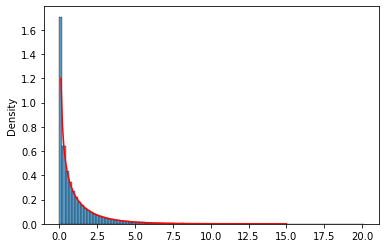

In [13]:
# Plotataan histogrammi.
# stat="density" -parametrin avulla histogrammi normalisoidaan tiheysfunktioksi.
sns.histplot(dt100000, bins=100, stat="density")

# Luodaan x-arvot chi2-jakauman käyrälle
x_vals = np.arange(0.1, 15.1, 0.1)

# Plotataan chi2-jakauman käyrä
plt.plot(x_vals, scipy.stats.chi2.pdf(x_vals, df=1), color="red");

- https://fi.wikipedia.org/wiki/Tiheysfunktio

<br>

<br>

<h3 align="left">Tehtävä 2</h3>

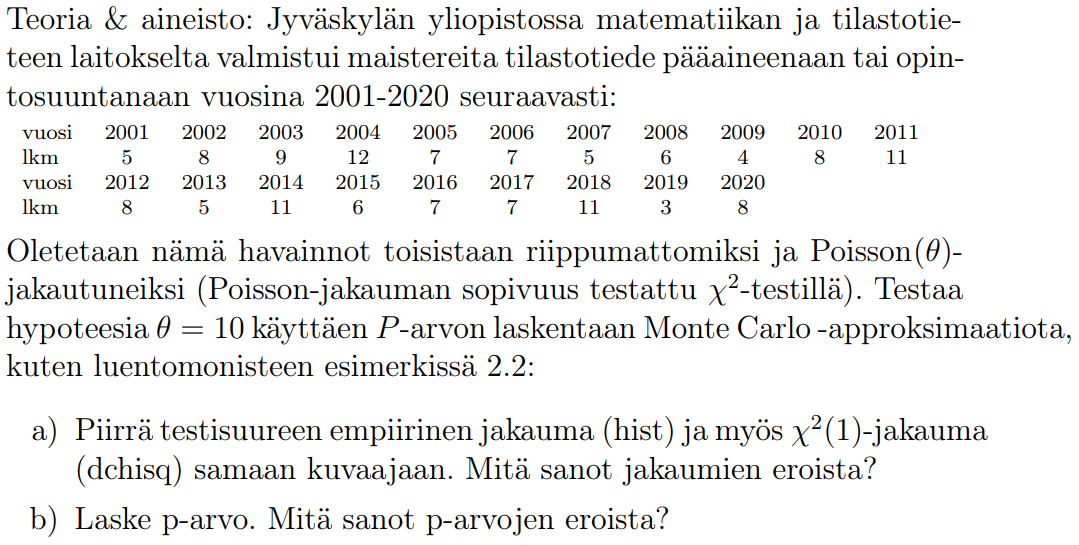

Kun $\, X_i,...,X_n \sim Poisson(\theta), \,$ niin logaritminen uskottavuusfunktio on muotoa

$$ l(\theta) = -n\theta \, + \, \sum\limits_{i=1}^{n} (x_i \, log(\theta) - log(x_i!)). $$

Suurimman uskottavuuden estimaattori $\, \widehat{\theta} \,$ saadaan asettamalla logaritmisen uskottavuusfunktion derivaatta nollaksi ja ratkaisemalla se $\, \theta \,$:n suhteen. Se on muotoa

$$\, \widehat{\theta} = \bar{x}. \,$$

Logaritminen uskottavuusosamäärän testi on muotoa

$$ D = -2 \, [l(\theta_0) - l(\widehat{\theta})]. $$

Jos havainnoit ovat riippumattomia, niin silloin D noudattaa eräin ehdoin asymptoottisesti $\, \chi^2 \,$ -jakaumaa vapausastein df=1.

Nyt saadaan

\begin{align*}
D_{obs} &= -2 \, [l(10) - l(\widehat{\theta})] \\
        &= -2 \, \left[\left(-n \cdot 10 \, + \, \sum\limits_{i=1}^{n} (x_i \, log(10) - log(x_i!))\right) - \left(-n \bar{x} \, + \, \sum\limits_{i=1}^{n} (x_i \, log(\bar{x}) - log(x_i!))\right)\right] \\
        &= -2 \, \left[n \, (\bar{x} - 10) \, + \, \sum\limits_{i=1}^{n} x_i \, log\left(\frac{10}{\bar{x}}\right) \right]
\end{align*}

In [14]:
def lr_poisson(x, theta0):
    """ Funktio laskee logaritmisen uskottavuusosamäärän testin """
    
    # Otoskoko
    n = len(x)
    
    # SU-estimaattori
    theta_hat = np.mean(x)
    
    # Logaritmisen uskottavuusosamäärän testi (ks. kaava yllä)
    return -2*(n*(theta_hat-10) + sum(x*np.log(10/np.mean(x))))

In [15]:
def monte_carlo_approx(x, theta0, m):
    """ Funktio laskee p-arvon käyttäen Monte Carlo -approksimaatiota """
    
    # Otoskoko
    n = len(x)
    
    # Lista, johon tallennetaan simuloidut logaritmisen uskottavuusosamäärän \
    # testin testisuureet.
    D_sim = []
    
    # Observoitu logaritmisen uskottavuusosamäärän testin testisuure.
    D_obs = lr_poisson(x, theta0)
    
    # Toistetaan simulointi m kertaa silmukassa.
    for k in range(m):
        
        # Simulointi Poisson-jakaumasta.
        x_sim = np.random.poisson(theta0, n)
        
        # Lisätään simuloitu testisuure D_sim -listaan.
        D_sim.append(lr_poisson(x_sim, theta0))
        
    # P-arvo
    p = sum(D_sim >= D_obs)/m
    
    # Palautetaan tuple, jossa p-arvo ja simuloidut testisuureen arvot.
    return p, D_sim

In [16]:
# Valmistuneet tilastotieteilijät vuosina 2001-2020
x = np.array([5, 8, 9, 12, 7, 7, 5, 6, 4, 8, 11, 8, 5, 11, 6, 7, 7, 11, 3, 8])

In [17]:
# Monte Carlo -approksimaation antama p-arvo
MCA = monte_carlo_approx(x, 10, 100000)
MCA[0]

0.00017

In [18]:
# Approksimatiivinen p-arvo
d_obs = lr_poisson(x, 10)
p_approx = 1 - scipy.stats.chi2(df=1).cdf(d_obs)
p_approx

0.00011500378864781613

- Koska p-arvo on tässä hyvin pieni, niin simulointien määrän on oltava suuri, jotta tarkkuus on hyvä.
- Huomataan, että p-arvot ovat samaa luokkaa.

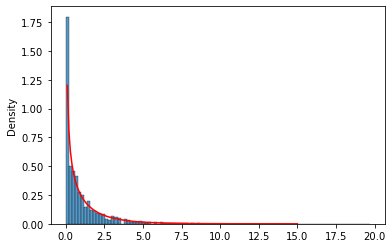

In [19]:
# Plotataan histogrammi
sns.histplot(MCA[1], bins=100, stat="density")

# Luodaan x-arvot chi2-jakauman käyrälle
x_arvot = np.arange(0.1, 15.1, 0.1)

# Plotataan chi2-jakauman käyrä
plt.plot(x_arvot, scipy.stats.chi2.pdf(x_arvot, df=1), color="red");

- Asymptoottisen ja empiirisen jakauman kuvaajissa ei näyttäisi olevan paljon eroa, mutta ehkä eroa on
enemmän kuin edellisessä. 
- Hankala sanoa kuvaajan perusteella. 

<br>

<br>

<h3 align="left">Tehtävä 3</h3>

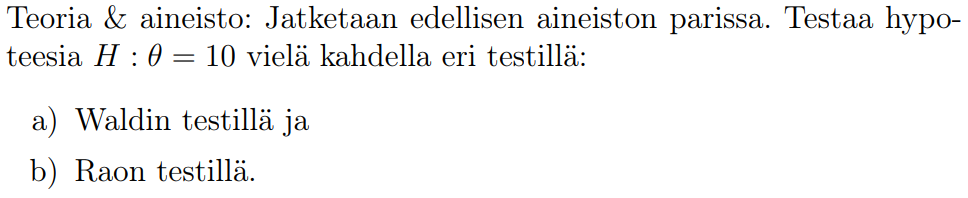

$X_i \sim Poisson(\theta), \,$ jolle $\, \boldsymbol{E}(X_i) = \theta. \,$ Olkoon hypoteesi $\, H : \theta = \theta_0, \,$ jossa $\, \theta_0 = 10. \,$


Poisson-jakauman log-uskottavuus:

$$ l(\theta) = -\theta n \, + \, \sum\limits_{i=1}^{n} (x_i \, log(\theta) - log(x_i !)) $$


Skoorifunktio (log-uskottavuuden 1. derivaatta):

$$ S(\theta) = \frac{d \, l(\theta)}{d \theta} = -n \, + \, \sum\limits_{i=1}^{n} \frac{x_i}{\theta} $$


Suurimman uskottavuuden estimaattori:

$$ \widehat{\theta} = \frac{1}{n} \sum\limits_{i=1}^{n} x_i =  \bar{x} $$


Skoorifunktion derivaatta (log-uskottavuuden 2. derivaatta):

$$ S'(\theta) = \frac{d^2 \, l(\theta)}{d \theta^2} = \sum\limits_{i=1}^{n} \frac{-x_i}{\theta^2} < 0 \quad \boldsymbol{\rightarrow} \widehat{\theta} \text{ on lokaali/globaali maksimi} $$


Fisher-informaatio:

$$ J(\theta) = \frac{-d^2 \, l(\theta)}{d \theta^2} = \frac{n}{\theta} $$

Waldin testisuureen jakauma, kun $\, \theta = \theta_0, \,$ on $\, \chi^2 \,$-jakauma vapausastein $\, df = dim(\theta). \,$ \
Waldin testisuure, kun $\, \theta_0 = 10, \,$ on muotoa:

\begin{align*}
W &= (\widehat{\theta} - \theta_0)^T \, J(\widehat{\theta}) \, (\widehat{\theta} - \theta_0) \\
  &= (\bar{x} - 10)^T \, \frac{n}{\bar{x}} \, (\bar{x} - 10) \quad \sim \chi^2 (1)
\end{align*}

In [20]:
# Valmistuneet tilastotieteilijät vuosina 2001-2020
x = np.array([5, 8, 9, 12, 7, 7, 5, 6, 4, 8, 11, 8, 5, 11, 6, 7, 7, 11, 3, 8])

In [21]:
# Havaittu Waldin testisuure
W_obs = (x.mean()-10).T * (len(x)/x.mean()) * (x.mean()-10)

In [22]:
np.round(W_obs, 2)

18.27

P-arvo:

$$ P(W \ge W_{obs}) = P(W \ge 18.27) $$

In [23]:
# Waldin testin testisuureen p-arvo
1 - scipy.stats.chi2(df=1).cdf(W_obs)

1.9167534556663313e-05

<br>

Raon pisteytysfunktiotestisuureen (score statistic) asymptoottinen jakauma on $\, \chi^2 \,$-jakauma vapausastein $\, df = dim(\theta): \,$

\begin{align*}
W_R &= S^T (\theta_0) \, J^{-1} (\theta_0) S (\theta_0) \quad \sim \chi^2 (1) \\
\end{align*}

In [24]:
# Raon testin testisuure (huomaa, että theta0 = 10, kuten aiemminkin)
W_R = (-len(x) + sum(x)/10).T * (len(x)/10)**(-1) * (-len(x) + sum(x)/10)

In [25]:
np.round(W_R, 2)

13.52

P-arvo:

$$ P(W_R \ge W_{obs}) = P(W_R \ge 13.52) $$

In [26]:
# Raon testin testisuureen p-arvo
1 - scipy.stats.chi2(df=1).cdf(W_R)

0.00023603441652930712

<br>

<br>

<h3 align="left">Tehtävä 4</h3>

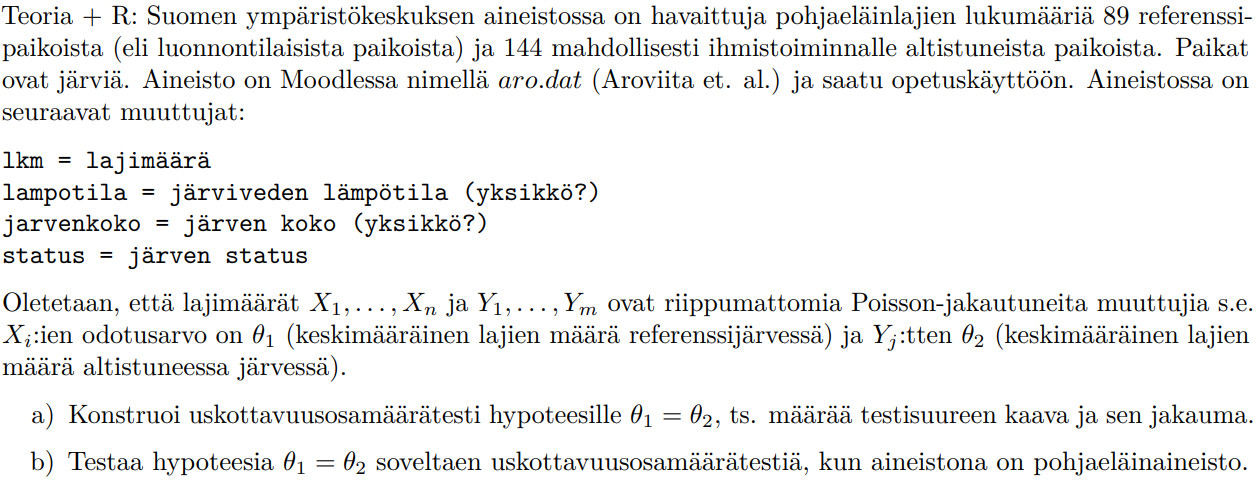

<br>

**Rajoitettu estimointi.** Hypoteesi asettaa rajoitteen $\, \theta_1 = \theta_2 = \theta. \,$ Tiedetään, että 

$$ X_i \sim Poisson(\theta), \quad E(X_i) = \theta $$ 
$$ Y_i \sim Poisson(\theta), \quad E(Y_i) = \theta. $$

Nyt log-uskottavuus on:

$$ l(\theta) = -n \theta - m \theta - c_1 + \sum\limits_{i=1}^{n} x_i \, log(\theta) + \sum\limits_{i=1}^{m} y_i \, log(\theta) \quad , \text {missä $c_1$ on parametreista riippumaton vakio.} $$


Suurimman uskottavuuden estimaattori:

$$ \tilde{\theta} = \frac{1}{n+m} \left(\sum\limits_{i=1}^{m} x_i + \sum\limits_{i=1}^{m} y_i \right) $$

<br>

**Rajoittamaton estimointi.**

$$ X_i \sim Poisson(\theta_1), \quad E(X_i) = \theta_1 $$ 
$$ Y_i \sim Poisson(\theta_2), \quad E(Y_i) = \theta_2. $$

Nyt log-uskottavuus on:

$$ l(\theta_1, \theta_2) = -n \theta_1 - m \theta_2 - c_2 + \sum\limits_{i=1}^{n} x_i \, log(\theta_1) + \sum\limits_{i=1}^{m} y_i \, log(\theta_2) \quad , \text {missä $c_2$ on parametreista riippumaton vakio.} $$


Osittaisderivoinnilla saadaan suurimman uskottavuuden estimaattorit:

$$ \hat{\theta}_1 = \frac{1}{n} \sum\limits_{i=1}^{n} x_i = \bar{x} $$

$$ \hat{\theta}_2 = \frac{1}{m} \sum\limits_{i=1}^{m} y_i = \bar{y} $$

Uskottavuusosamäärätestin testisuure ja sen approksimatiivinen jakauma:

$$ D = -2 \, [l(\tilde{\theta}) - l(\hat{\theta}_1, \hat{\theta}_2)] \quad \sim \chi^2 (1), $$

sillä kun **H** on voimassa, niin $\, D \sim \chi^2 \,$ vapausastein $\, df = dim(\Theta) - dim(\Theta_0) = 2 - 1 = 1. \,$

<br>

In [97]:
data = pd.read_csv("C:/Users/testi/Desktop/Statistical_Inference2/aro_dat.csv",
                   index_col=0)

In [98]:
data.head()

,lkm,lampotila,jarvenkoko,status
1,17.0,202.0,9.654223,ref
2,12.0,201.0,7.504400,ref
3,18.0,202.0,8.764771,ref
4,17.0,206.0,9.596114,ref
5,19.0,212.0,9.356681,ref


In [99]:
data.dtypes

lkm           float64
lampotila     float64
jarvenkoko    float64
status         object
dtype: object

In [100]:
data.shape

(233, 4)

In [101]:
data["status"].value_counts()

imp    144
ref     89
Name: status, dtype: int64

Tarkistetaan puuttuvat havainnot. Tehtävää varten halutaan valita ainoastaan täydelliset havainnot.

In [104]:
data.isna().any()

lkm            True
lampotila      True
jarvenkoko     True
status        False
dtype: bool

In [106]:
data.isna().any().sum()

3

In [107]:
# Poistetaan 3 puuttuvaa havaintoyksikköä
data = data.dropna()

In [109]:
data.isna().any().sum()

0

- Ok.

In [112]:
X = data[data["status"] == "ref"]["lkm"]
Y = data[data["status"] == "imp"]["lkm"]

theta_tilde = 1/(len(X)+len(Y)) * (sum(X) + sum(Y))
theta_hat1 = X.mean()
theta_hat2 = Y.mean()

In [122]:
def log_likelihood(theta1, theta2, x, y):
    """ Funktio laskee log-uskottavuuden (ilman parametreista riippumatonta vakiota) """
    n = len(x)
    m = len(y)
    l = -n*theta1 - m*theta2 + sum(x)*np.log(theta1) + sum(y)*np.log(theta2)
    return l

In [136]:
# Havaittu uskottavuusosamäärätestin testisuure 
D_observed = -2*(log_likelihood(theta_tilde, theta_tilde, X, Y) \
                 - log_likelihood(theta_hat1, theta_hat2, X, Y))
D_observed

21.680131889190307

In [137]:
# Havaitun uskottavuusosamäärätestin testisuureen p-arvo
1 - scipy.stats.chi2(df=1).cdf(D_observed)

3.221102278683219e-06

Lasketaan myös uskottavuussuhde

$$ R = \frac{L(\tilde{\theta})}{L(\hat{\theta})}, $$

joka mitaaa, kuinka paljon data **parhaimmillaan** tukee hypoteesia **H** verrattuna **maksimaaliseen** tukeen (mallin puitteissa). Jos hypoteesi on voimassa, niin silloin uskottavuussuhde on lähellä lukua 1 (eli mitä lähempänä uskottavuussuhde R on lukua 1, sitä parempaa tukea saadaan hypoteesille **H**). Jos taas hypoteesille **H** ei saada tukea, niin uskottavuussuhde R on pienempi kuin 1.

Uskottavuussuhde R saadaan laskettua samalla tapaa kuin uskottavuusosamäärätestin testisuureen arvo. Ainoana erona on se, että uskottavuussuhteen R kaavassa on uskottavuusfunktio (ilman logaritmia). Siispä se saadaan yksinkertaisesti laittamalla se eksponenttifunktion sisään. Uskottavuussuhdetta ei myöskään kerrota luvulla -2.

In [134]:
# Uskottavuuksien suhde
R_observed = np.exp((log_likelihood(theta_tilde, theta_tilde, X, Y) \
                     - log_likelihood(theta_hat1, theta_hat2, X, Y)))
R_observed

1.959833499452442e-05

- Uskottavuusosamäärä on hyvin lähellä nollaa (≈ 0.0000196).

    $\, \quad \boldsymbol{\rightarrow} \,$ Aineisto on ristiriidassa hypoteesin **H**  ja tehtyjen oletusten kanssa.

<br>

<br>

<h3 align="left">Tehtävä 6</h3>

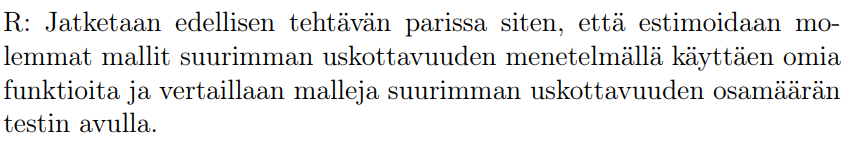

Aiemmasta tehtävästä saatua:

$$ l(\alpha) = -n \, exp(\alpha) + c + \alpha \, \sum\limits_{i=1}^{n} x_i $$

$$ l(\alpha, \beta) = c \, - \, exp \left(\sum\limits_{i=1}^{n} (\alpha \, + \, \beta z_i)\right) + \sum\limits_{i=1}^{n} x_i \, (\alpha \, + \, \beta z_i) $$

Maksimoidaan molemmat uskottavuudet, ts. haetaan parametrien suurimman uskottavuuden estimaatit.

In [207]:
def l1(alpha, x):
    """ Funktio laskee logaritmisen uskottavuusfunktion ilman vakiota c """
    
    theta = np.exp(alpha)
    n = len(x)
    return -n*theta + alpha*sum(x)

In [208]:
from scipy.optimize import minimize

In [248]:
n1 = len(X)
n2 = len(Y)

# Luodaan taulukko, jossa on muuttujien X ja Y arvot
xy = np.concatenate((X, Y))

# zi:t ovat havaitut kovariaatin arvot eli alue siten, että zi=0,
# jos alue on ref, ja zi=1, jos alue on imp.
z = np.concatenate((np.zeros(n1, dtype=int), np.ones(n2, dtype=int)))

# Maksimoidaan logaritminen uskottavuusfunktio scipyn minimize-funktiolla.
# HUOMAA negatiivnen etumerkki l1-funktion edessä!
# Minimointitehtävästä saadaan maksimointitehtävä yksinkertaisesti kääntämällä etumerkkiä.
maximize_l1 = minimize(lambda alfa: -l1(alfa, xy), x0=0.1, method="L-BFGS-B")

In [249]:
maximize_l1

      fun: array([-6754.60310867])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.0005457])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([2.79214715])

In [250]:
print(f"Optimal alfa: {maximize_l1.x[0]}")

Optimal alfa: 2.7921471529894037


<br>

In [243]:
def l2(params, x, z):
    alfa, beta = params
    return np.sum((alfa + beta * z) * x) - np.sum(np.exp(alfa + beta * z))

In [252]:
maximize_l2 = minimize(lambda params: -l2(params, xy, z), 
                       x0=[0.1, 0.1],
                       method="L-BFGS-B")

In [253]:
maximize_l2

      fun: -6765.443174581737
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.01527951, 0.0086402 ])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([ 2.88411412, -0.15423421])

In [255]:
print(f"Optimal alfa: {maximize_l2.x[0]}")
print(f"Optimal beta: {maximize_l2.x[1]}")

Optimal alfa: 2.8841141154277468
Optimal beta: -0.1542342124671337
